# 1. 데이터 불러와서 확인

In [1]:
import pandas as pd
data = pd.read_csv('Fvote.csv')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [2]:
data.describe()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>,
        <AxesSubplot:title={'center':'region_Honam'}>],
       [<AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngnam'}>,
        <AxesSubplot:title={'center':'edu'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>,
        <AxesSubplot:title={'center':'score_progress'}>],
       [<AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>, <AxesSubplot:>]],
      dtype=object)

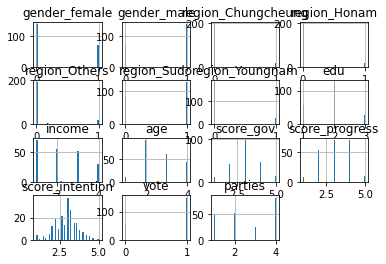

In [5]:
data.hist(bins=50)

# 2. X,y 나누기

In [7]:
X = data.loc[:,'gender_female':'score_intention']
y = data[['vote']]

# 3. train_test 나누기

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

# 4. 정규화

## 가. min-max

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [30]:
scaler_minmax.fit(X_train)

MinMaxScaler()

In [31]:
X_scaled_mm_train = scaler_minmax.transform(X_train)

In [32]:
pd.DataFrame(X_scaled_mm_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.367089,0.632911,0.088608,0.107595,0.088608,0.582278,0.132911,0.427215,0.392405,0.569620,0.517405,0.539557,0.474684
std,0.483544,0.483544,0.285080,0.310853,0.285080,0.494752,0.340558,0.313324,0.353966,0.299336,0.242921,0.238630,0.191686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_scaled_mm_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_mm_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.264151,0.735849,0.056604,0.037736,0.113208,0.641509,0.150943,0.452830,0.433962,0.496855,0.504717,0.476415,0.486792
std,0.445099,0.445099,0.233295,0.192380,0.319878,0.484146,0.361420,0.314156,0.361531,0.258386,0.216454,0.241510,0.147136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.333333,0.500000,0.250000,0.400000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.333333,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


## 나. 표준화 (standardization)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler_ss = StandardScaler()

In [35]:
scaler_ss.fit(X_train)
X_scaled_ss_train = scaler_ss.transform(X_train)
pd.DataFrame(X_scaled_ss_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-5.761917e-17,-2.529622e-17,-1.700468e-16,1.686415e-16,-9.134746e-17,1.096170e-16,-5.621382e-18,1.753169e-16,-1.883163e-16,2.719344e-16,1.206841e-16,1.054009e-16,1.573987e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-7.615773e-01,-1.313064e+00,-3.118048e-01,-3.472281e-01,-3.118048e-01,-1.180652e+00,-3.915159e-01,-1.367830e+00,-1.112119e+00,-1.908997e+00,-2.136707e+00,-2.268248e+00,-2.484234e+00
25%,-7.615773e-01,-1.313064e+00,-3.118048e-01,-3.472281e-01,-3.118048e-01,-1.180652e+00,-3.915159e-01,-1.367830e+00,-1.112119e+00,-7.918804e-01,-7.187700e-02,-1.217271e+00,-6.525254e-01
50%,-7.615773e-01,7.615773e-01,-3.118048e-01,-3.472281e-01,-3.118048e-01,8.469896e-01,-3.915159e-01,2.330376e-01,-1.674157e-01,3.252366e-01,-7.187700e-02,-1.662938e-01,1.324925e-01
75%,1.313064e+00,7.615773e-01,-3.118048e-01,-3.472281e-01,-3.118048e-01,8.469896e-01,-3.915159e-01,2.330376e-01,7.772873e-01,3.252366e-01,9.605381e-01,8.846833e-01,6.558377e-01
max,1.313064e+00,7.615773e-01,3.207135e+00,2.879951e+00,3.207135e+00,8.469896e-01,2.554175e+00,1.833905e+00,1.721990e+00,1.442354e+00,1.992953e+00,1.935660e+00,2.749219e+00


In [36]:
X_scaled_ss_test = scaler_ss.transform(X_test)
pd.DataFrame(X_scaled_ss_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,-0.213559,0.213559,-0.112620,-0.225448,0.086566,0.120099,0.053117,0.082012,0.117778,-0.243861,-0.052397,-0.265443,0.063371
std,0.923421,0.923421,0.820952,0.620846,1.125633,0.981675,1.064630,1.005843,1.024619,0.865943,0.893881,1.015288,0.770032
min,-0.761577,-1.313064,-0.311805,-0.347228,-0.311805,-1.180652,-0.391516,-1.367830,-1.112119,-1.908997,-2.136707,-2.268248,-1.437543
25%,-0.761577,-1.313064,-0.311805,-0.347228,-0.311805,-1.180652,-0.391516,0.233038,-1.112119,-0.791880,-0.071877,-1.217271,-0.390853
50%,-0.761577,0.761577,-0.311805,-0.347228,-0.311805,0.846990,-0.391516,0.233038,-0.167416,-0.791880,-0.071877,-0.166294,0.132492
75%,1.313064,0.761577,-0.311805,-0.347228,-0.311805,0.846990,-0.391516,0.233038,0.777287,0.325237,0.960538,0.884683,0.394165
max,1.313064,0.761577,3.207135,2.879951,3.207135,0.846990,2.554175,1.833905,1.721990,1.442354,1.992953,1.935660,2.225873


# 5.모델학습

## 가. min-max 정규화 데이터 적용

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_scaled_mm_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [40]:
model.score(X_scaled_mm_train,y_train)

0.6962025316455697

In [41]:
model.predict(X_scaled_mm_train)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [42]:
model.predict_proba(X_scaled_mm_train)

array([[0.20165214, 0.79834786],
       [0.28414463, 0.71585537],
       [0.5601534 , 0.4398466 ],
       [0.30728698, 0.69271302],
       [0.23754172, 0.76245828],
       [0.16588751, 0.83411249],
       [0.23944001, 0.76055999],
       [0.49275668, 0.50724332],
       [0.18097393, 0.81902607],
       [0.30121851, 0.69878149],
       [0.33278709, 0.66721291],
       [0.21437683, 0.78562317],
       [0.35570983, 0.64429017],
       [0.26183508, 0.73816492],
       [0.57514357, 0.42485643],
       [0.19738102, 0.80261898],
       [0.2837495 , 0.7162505 ],
       [0.23551117, 0.76448883],
       [0.30678931, 0.69321069],
       [0.57138944, 0.42861056],
       [0.11242712, 0.88757288],
       [0.3679153 , 0.6320847 ],
       [0.20459382, 0.79540618],
       [0.25407303, 0.74592697],
       [0.41124804, 0.58875196],
       [0.22758001, 0.77241999],
       [0.19274835, 0.80725165],
       [0.09763328, 0.90236672],
       [0.32894586, 0.67105414],
       [0.14373409, 0.85626591],
       [0.

In [45]:
    model.score(X_scaled_mm_test,y_test)

0.7735849056603774

## 나. 표준화 적용 훈련


In [46]:
model.fit(X_scaled_ss_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [47]:
model.score(X_scaled_ss_train,y_train)

0.6835443037974683

In [48]:
model.score(X_scaled_ss_test,y_test)

0.7547169811320755